In [1]:
import cv2
import os
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

**Detecting Face on Single Image**

1/1 [==============================] - 0s 156ms/step


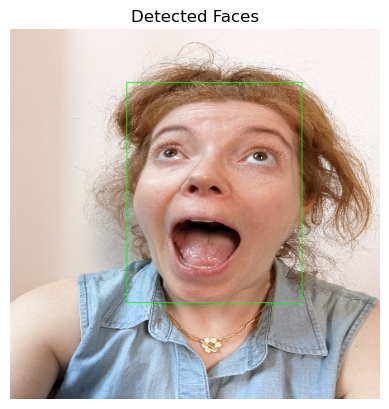

In [2]:
# Load an image for different users
# image_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data\\subject_0\\PXL_20220922_132845778.PORTRAIT.jpg'
image_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized\\1_PXL_20220922_162832750.jpg'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB for matplotlib

# Create MTCNN detector
detector = MTCNN()

# Detect faces
faces = detector.detect_faces(image)

# Draw bounding boxes on the image
for face in faces:
    bounding_box = face['box']
    cv2.rectangle(
        image_rgb,
        (bounding_box[0], bounding_box[1]),
        (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
        (0, 255, 0),  # BGR color format: Green color
        1  # Thickness of the rectangle
    )

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Detected Faces')
plt.show()

**Extracting Face to seperate Folder**

In [3]:
# destination_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst_faces'
destination_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'

os.makedirs(destination_directory, exist_ok=True)

image_filename = '1_PXL_20220922_162832750.jpg'

if len(faces) > 0:
        largest_face = max(faces, key=lambda f: f['box'][2] * f['box'][3])
        x, y, w, h = largest_face['box']

        min_face_size = 50
        if w > min_face_size and h > min_face_size:
            face = image[y:y+h, x:x+w]

            extracted_face_filename = f'{os.path.splitext(image_filename)[0]}_face.jpg'
            extracted_face_path = os.path.join(destination_directory, extracted_face_filename)

            cv2.imwrite(extracted_face_path, face)
        else:
            print(f"Face in {image_filename} is too small and will be skipped.")
else:
    print(f"No face detected in {image_filename}.")


print("Face extraction complete.!!!")

Face extraction complete.!!!
